In [5]:

from os import path, makedirs, listdir
from shutil import move
import traceback
from spacepy import pycdf
import numpy as np
import h5py
from subprocess import call
from tempfile import TemporaryDirectory
from tqdm import tqdm
import scipy


In [2]:
#with pycdf.CDF(path.join('./extracted/S1', 'Poses_D3_Angles_mono', 'Directions #1.54138969.cdf')) as cdf:
#    data = cdf['Pose'][0]
#    angle_data = data.reshape(-1,26,3)

with pycdf.CDF(path.join('./extracted/S1', 'Poses_D2_Positions_mono', 'Directions 1.54138969.cdf')) as cdf2:
    pose_data = cdf2['Pose'][0]
    pose_data = pose_data.reshape(-1, 32, 3)

print(angle_data[150][0])
print(pose_data[150][0])


CDFError: NO_SUCH_CDF: The specified CDF does not exist.

In [18]:
import scipy.io as sio
import h5py
import mat73

a = mat73.loadmat('./extracted/S1/BBox/Directions 1.54138969.mat')
print(a)
#with h5py.File('./extracted/S1/BBox/Directions 1.54138969.mat', 'r') as f:
    #print(f.keys())
    #print(f['#refs#'])
    
#sio.loadmat('./extracted/S1/BBox/Directions 1.54138969.mat')

lse, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...

In [61]:
masks = np.array(a['Masks'])


In [89]:
bbox_arr = None
for i in range(masks.shape[0]):
    a = np.where(masks[i] != 0)
    min_x = np.min(a[1])
    min_y = np.min(a[0])
    width = np.max(a[1]) - min_x
    height = np.max(a[0] - min_y)
    bbox = np.array([min_x, min_y, width, height])
    bbox_arr = bbox if bbox_arr is None else np.vstack((bbox_arr, bbox)) 
print(bbox_arr.shape)

(1383, 4)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


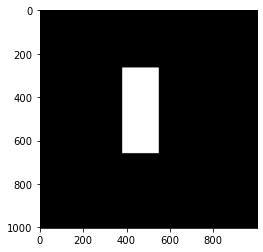

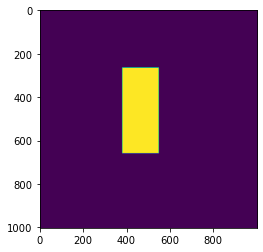

In [97]:
import cv2
sample = np.zeros((1002, 1000, 3))
img = cv2.rectangle(sample, (bbox_arr[0][0], bbox_arr[0][1]), (bbox_arr[0][0]+ bbox_arr[0][2], bbox_arr[0][1]+ bbox_arr[0][3]), (255,255,255), -1)
plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(masks[0])


In [42]:
bbox[0][]

array([0])

[264, 658, 377, 545]


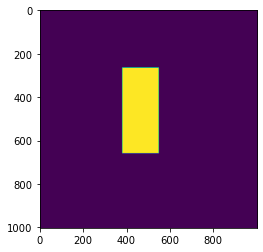

In [37]:
import matplotlib.pyplot as plt
d= np.where(a['Masks'][0]  != 0)
bbox = [np.min(d[0]), np.max(d[0])+1, np.min(d[1]), np.max(d[1])+1]
print(bbox)
plt.imshow(a['Masks'][0])

In [9]:
import glob, cv2, h5py, os

base_dir = "./processed/S9/Greeting-2/imageSequence/"
h5f = h5py.File('./processed/S9/Greeting-2/annot.h5', 'r')
img_list = []
CAMERA_ID = ["54138969","55011271","58860488","60457274"]
for cam in CAMERA_ID:
    img_list += sorted(glob.glob(os.path.join(base_dir, cam, "*.jpg")))
print(img_list[0])

from spacepy import pycdf
cdf = pycdf.CDF('./extracted/S9/Poses_D3_Positions/Greeting.cdf')
global_p3d = np.array(cdf['Pose'])[0].reshape(-1, 32, 3)

./processed/S9/Greeting-2/imageSequence/54138969/img_000001.jpg


54138969
5
./processed/S9/Greeting-2/imageSequence/54138969/img_000961.jpg
(92, 32, 3) (1447, 32, 3)


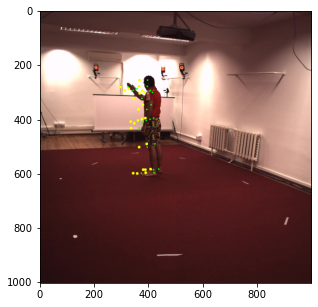

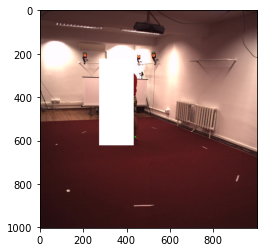

In [23]:
import matplotlib.pyplot as plt
bbox_arr = h5f['pose']["bbox"]
pose = h5f['pose']["2d"]
pose_3d = h5f['pose']["3d"]

idx = 15
cameras = load_cameras_from_xml(os.path.join("./","metadata.xml"), subjects=[9,11])
cameras = [cameras[9,1], cameras[9,2], cameras[9,3], cameras[9,4]]
print(h5f['camera'][idx])
print(h5f['action'][idx])
print(img_list[idx])


R, T, f, c, k,p, name = cameras[0]
print(pose_3d.shape, global_p3d.shape)

p3d = pose_3d[idx]
gp3d = global_p3d[64*idx]

gp2d = project_point_radial(gp3d, R, T, f, c, k,p)[0]
p2d = project_point_radial2(p3d, f,c,k,p)
#print(gp2d)
img = cv2.cvtColor(cv2.imread(img_list[idx]), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
for i in range(pose[idx].shape[0]):
    img = cv2.circle(img, (int(pose[idx][i][0])+30, int(pose[idx][i][1])), 3, (0,255,0), -1)
for i in range(pose[idx].shape[0]):
    img = cv2.circle(img, (int(gp2d[i][0]), int(gp2d[i][1])), 5, (255,255,0), -1)
plt.imshow(img)
img = cv2.rectangle(img, (bbox_arr[idx][0], bbox_arr[idx][1]), (bbox_arr[idx][0]+ bbox_arr[idx][2], bbox_arr[idx][1]+ bbox_arr[idx][3]), (255,255,255), -1)
plt.figure()

plt.imshow(img)

In [3]:
from cameras import load_cameras_from_xml, project_point_radial2, project_point_radial
cameras = load_cameras_from_xml(os.path.join("./","metadata.xml"), subjects=[9,11])


In [4]:
base = '/mnt/ssd2/h36m-dataset/test/Greeting/'
img_list = sorted(glob.glob(os.path.join(base, '*.jpg')))
annot = np.load(os.path.join(base, 'annot.npz'))
pose = annot['pose_2d']




NameError: name 'glob' is not defined

['pose_2d', 'pose_3d', 'camera_id', 'subject']

(488, 32, 2)
1


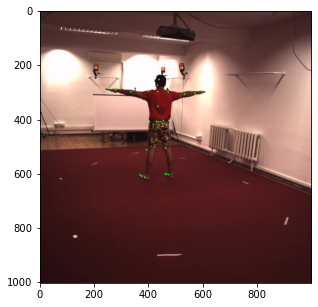

In [201]:
idx = 280
print(pose.shape)
img = cv2.cvtColor(cv2.imread(img_list[idx]), cv2.COLOR_BGR2RGB)
print(annot['camera_id'][idx])
plt.figure(figsize=(5,5))
for i in range(pose[idx].shape[0]):
    img = cv2.circle(img, (int(pose[idx][i][0]+30), int(pose[idx][i][1])), 3, (0,255,0), -1)
plt.imshow(img)

In [2]:
cameras = load_cameras_from_xml(os.path.join("./","metadata.xml"), subjects=[9])
cameras2 = load_cameras_from_xml(os.path.join("./","metadata2.xml"), subjects=[9])


NameError: name 'load_cameras_from_xml' is not defined

In [385]:
t = 4
print(cameras[9,1][t] - cameras2[9,1][t])

[[0.]
 [0.]
 [0.]]
